In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_series(time, series, format = '-', start = 0, end = None, label = None):
    plt.plot(time[start:end], series[start:end], format, label = label)
    plt.xlabel('time')
    plt.ylabel('value')
    if label:
        plt.legend(fontsize = 14)
    plt.grid(True)

def trend(time, slope = 0):
    return slope * time

def seasonal_pattern(season_time):
    return np.where(season_time < 0.4, np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3*season_time))

def seasonality(time, period, amplitude = 1, phase = 0):
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def white_noise(time, noise_level = 0, seed = None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

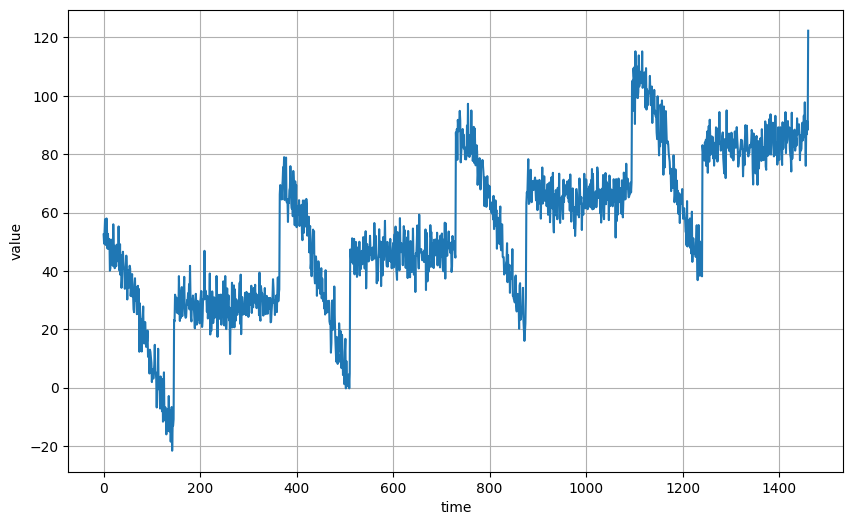

In [3]:
time = np.arange(4 * 365 + 1)

slope = 0.05
baseline = 10
amplitude = 40
series = baseline + trend(time, slope) + seasonality(time, period = 365, amplitude = amplitude)

noise_level = 5
noise = white_noise(time, noise_level, seed = 42)

series += noise

plt.figure(figsize = (10, 6))
plot_series(time, series)
plt.show()

In [4]:
split_time = 1000
time_tr = time[:split_time]
x_tr = series[:split_time]
time_val = time[split_time:]
x_val = series[split_time:]

In [5]:
naive_forecast = series[split_time - 1:-1]

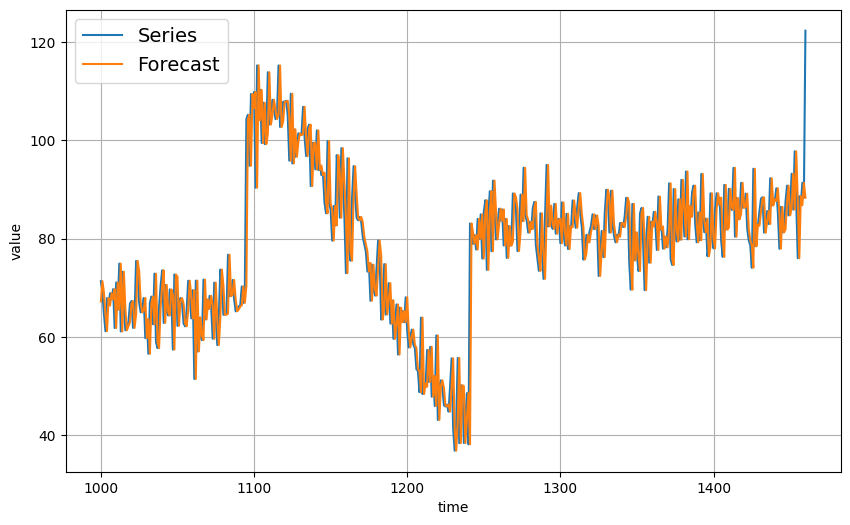

In [6]:
plt.figure(figsize = (10, 6))
plot_series(time_val, x_val, label = 'Series')
plot_series(time_val, naive_forecast, label = 'Forecast')

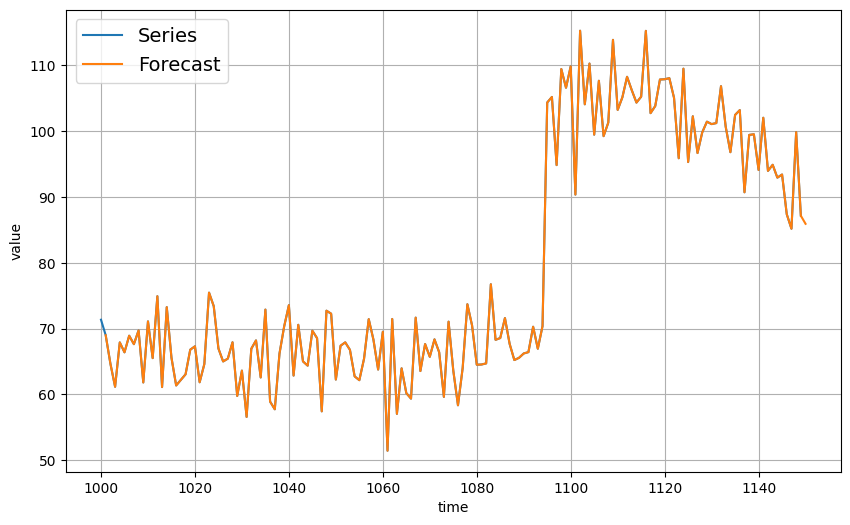

In [8]:
plt.figure(figsize = (10, 6))
plot_series(time_val, x_val, start = 0, end = 150, label = 'Series')
plot_series(time_val, x_val, start = 1, end = 151, label = 'Forecast')

In [9]:
error = naive_forecast - x_val
abs_error = np.abs(error)
mae = abs_error.mean()
mae

5.9379085153216735